# Assignment no 88 Batch Normalization (17.5.23)

### Q1: Theory and Concepts

#### a. Explain the concept of batch normalization in the context of Artificial Neural Networks (ANNs).

**Ans-:** Batch normalization is a technique to improve the training of deep neural networks by normalizing the inputs to each layer, which helps maintain a more stable learning process. The idea is to normalize the inputs across a mini-batch so that they have a mean of zero and a variance of one, which makes the learning more efficient. This reduces internal covariate shifts, where the distribution of inputs to layers in the network changes during training, leading to faster convergence and higher stability.

### b. Describe the benefits of using batch normalization during training.

**Ans-:**

**1. Accelerated Training:** Batch normalization allows for higher learning rates, as it reduces the likelihood of the gradient getting stuck in local minima or exploding.

**2. Regularization Effect:** Although not a replacement for dropout or other regularization techniques, batch normalization helps reduce overfitting.

**3. Improved Model Generalization:** It makes the model less sensitive to initializations and improves the generalization performance.

**4. Stabilizes Activations:** By normalizing the inputs to each layer, activations remain within a consistent range, stabilizing the training process.

c. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

**Ans:**

1. Normalization Step: For each mini-batch of inputs x, batch normalization first computes the mean μ and variance σ^2 for the batch:

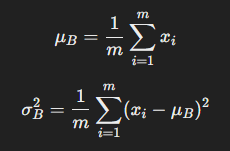
 
Then, it normalizes the batch:

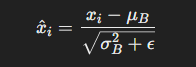
 
where ϵ is a small constant added to avoid division by zero.

2. Learnable Parameters: To restore the model's expressive power after normalization, batch normalization introduces two learnable parameters: a scale factor γ and a shift parameter β. The output of the batch normalization layer is:
   
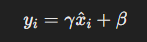

These parameters are learned during the training process.

### Q2. Implementation:

### 1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

In [1]:
#Importing necessary libraries.

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading and normalizing the dataset.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


### 2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,TensorFlow, PyTorch).

In [3]:
# Creating a sequential neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3. Train the neural network on the chosen dataset without using batch normalization.

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8737 - loss: 0.4291 - val_accuracy: 0.9645 - val_loss: 0.1149
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9675 - loss: 0.1069 - val_accuracy: 0.9692 - val_loss: 0.1014
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9781 - loss: 0.0695 - val_accuracy: 0.9734 - val_loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9751 - val_loss: 0.0783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9759 - val_loss: 0.0832
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9781 - val_loss: 0.0787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 0.9746 - val_loss: 0.0903
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9932 - loss: 0.02

### 4. Implement batch normalization layers in the neural network and train the model again.

In [5]:
model_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8823 - loss: 0.4027 - val_accuracy: 0.9614 - val_loss: 0.1303
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9621 - loss: 0.1210 - val_accuracy: 0.9672 - val_loss: 0.0982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9719 - loss: 0.0894 - val_accuracy: 0.9705 - val_loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9771 - loss: 0.0725 - val_accuracy: 0.9720 - val_loss: 0.0907
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9791 - loss: 0.0643 - val_accuracy: 0.9783 - val_loss: 0.0673
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9819 - loss: 0.0550 - val_accuracy: 0.9785 - val_loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9835 - loss: 0.0492 - val_accuracy: 0.9800 - val_loss: 0.0665
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9870 - loss: 

### 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

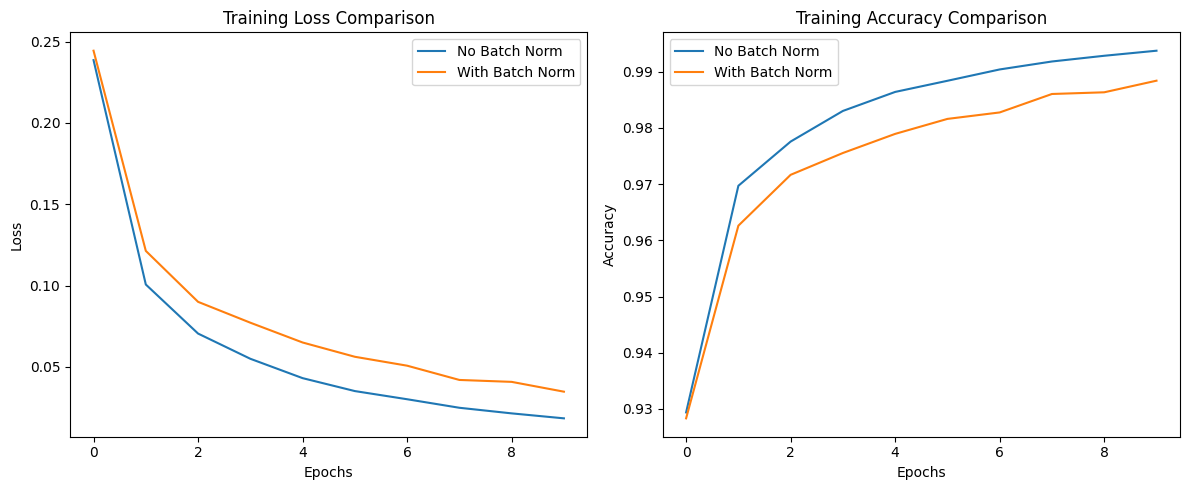

In [6]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting loss on the first subplot
ax1.plot(history.history['loss'], label='No Batch Norm')
ax1.plot(history_bn.history['loss'], label='With Batch Norm')
ax1.set_title('Training Loss Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='No Batch Norm')
ax2.plot(history_bn.history['accuracy'], label='With Batch Norm')
ax2.set_title('Training Accuracy Comparison')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots side by side
plt.tight_layout()
plt.show()


### 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

**Ans:** You should observe that the model with batch normalization converges faster and achieves higher accuracy. Additionally, it may generalize better on the test set.

## Q3: Experimentation and Analysis


### a. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

In [7]:
# Train with different batch sizes

history_small_batch = model_bn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9884 - loss: 0.0334 - val_accuracy: 0.9794 - val_loss: 0.0685
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9890 - loss: 0.0324 - val_accuracy: 0.9791 - val_loss: 0.0738
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9910 - loss: 0.0252 - val_accuracy: 0.9799 - val_loss: 0.0762
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9784 - val_loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9916 - loss: 0.0239 - val_accuracy: 0.9791 - val_loss: 0.0798
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9787 - val_loss: 0.0846
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9930 - loss: 0.0211 - val_accuracy: 0.9803 - val_loss: 0.0769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9937 - loss: 0

In [8]:
history_large_batch = model_bn.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9985 - loss: 0.0049 - val_accuracy: 0.9835 - val_loss: 0.0648
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9838 - val_loss: 0.0639
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9837 - val_loss: 0.0641
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9842 - val_loss: 0.0637
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9841 - val_loss: 0.0637
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 1.0000 - loss: 9.5714e-04 - val_accuracy: 0.9844 - val_loss: 0.0641
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 1.0000 - loss: 7.8661e-04 - val_accuracy: 0.9844 - val_loss: 0.0647
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 1.0000 - loss: 7.4539e-0

### b. Discuss the advantages and potential limitations of batch normalization:

**Ans:**

**Advantages:**
1. Faster training due to stable gradients.
2. Less sensitivity to weight initialization.
3. Acts as a form of regularization.
   
**Limitations:**
1. Computational overhead due to the additional operations.
2. Does not perform well with very small batch sizes.
3. Can sometimes lead to over-normalization, which might hurt model performance on some tasks.
